# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
# <a href=http://www.datascience-paris-saclay.fr/en/site/newsView/12>RAMP</a> on mortality prediction of septic patients

<i> Balázs Kégl (LAL/CNRS), Alex Gramfort (LTCI/Telecom ParisTech), Djalel Benbouzid (UPMC), Mehdi Cherti (LAL/CNRS) </i>

## Introduction

The data used here were used in the following doctoral work.

<i>Prediction of mortality in septic patients with hypotension,</i>
Louis Mayaud, PhD, Dept. of Engineering Science, University of Oxford
https://www.dropbox.com/s/co8tb3l2dtovl5j/LMayaud_Thesis.pdf?dl=0

These data are extracted from the MIMIC II Database kindly opened by MIT.

The MIMIC-II research database (Multiparameter Intelligent Monitoring in Intensive Care) is notable for three factors: it is publicly and freely available; it encompasses a diverse and very large population of intensive care unit (ICU) patients; and it contains high temporal resolution data including lab results, electronic documentation, and bedside monitor trends and waveforms. The database can support a diverse range of analytic studies spanning epidemiology, clinical decision-rule improvement, and electronic tool development.

https://mimic.physionet.org/database.html

The Multi-parameter Intelligent Monitoring in the Intensive Care II (MIMIC-II) database is the result of a collaborative project between the Laboratory of Computational Physiology (Harvard-MIT, Health Science and Technology), Philips Medical Systems and Beth Israel Deaconess Medical Centre (BIDMC) aiming at the development and evaluation of advanced ICU monitoring systems.

The data analyzed today is only a fraction of the full database that you're invited to explore in parallel or after the course.

### Objective: 

The objective of this bootcamp is to develop a system to predict the mortality of a septic patient in ICU given some data obtained at the hospital.

Info on sepsis : http://en.wikipedia.org/wiki/Sepsis

### Description of the available data

The dataset contains data from 1713 patients described by 753 variables


The number of variables in the MIMIC-II database is vast: about five thousand are available in the chart events table and more than seven hundred in the laboratory events table. Many of these variables have similar meanings and could be merged while others are present in too few patients to be useful. Yet, the amount of available covariates constitutes a typical challenge of clinical data-mining. Information available in MIMIC-II generally includes :

* Demographics age, gender, admission type and source, ethnicity, religion and, social security group (at admission)
* Laboratory results results from all the blood samples (a few times a day)
* Vital signs nurse-verified values entered in bedside monitors including HR, ABP, Arterial Oxygen Saturation (SpO2), and Breathing Rate (BR) – approximately sampled once an hour
* Medication given to patients and mode of administration
* Administrative data used for billing and administrative monitoring (at discharge)
* Free text notes that comprise nurse notes, radiology reports and discharge summary; 
* Outcome In-hospital mortality, in-ICU mortality and date of death (outside the hospital) when applicable.
* The population of interest here are all adult patients with severe sepsis presenting hypotension for which adequate interventions were found.


#### Variables available in the dataset:

Variables are either boolean, categorical, or continuous. There are some missing data. Variables of the form AAA_BBB_CCC are an ICD9 boolean code. A variable of the form VAR-0->24-mean corresponds to the mean of a variable during the first 24 hours after admission in the careunit. Same for VAR-0->24-min, VAR-0->24-max, VAR-0->24-std.

Now a partial list of variables:

* ADMISSION_SOURCE_DESCR: admission type and source
* AGE: The age of the patient
* AIDS: True if patient suffered from Acute Immune Dysfunction Syndrome.
* ALCOHOL_ABUSE : True if patient suffered from alcohol abuse.
* ALP: blood test result, level of Alkaline phosphatase protein
* AST: blood test result, level of aspartate aminotransferase protein
* Albumin: blood test result, level of albumin
* BLOOD_LOSS_ANEMIA: binary, code ICD9 (comorbidité) van val raven score
* BUN:  Blood Urea Nitrogen
* Bilirubin: blood test level
* Bypass: True if bypass surgery was performed.
* CARDIAC_ARRHYTHMIAS: True if patient suffers from cardiac arrhythmia
* CHRONIC_PULMONARY: True if patient suffers from chronic pulmonary problem
* CO: cardiooutput. Amount of blood going out of the heart.
* HC03: bicarbonate, diluation gaz dans le sang
* CONGESTIVE_HEART_FAILURE: binary ICD9
* Cirrhosis: True if suffers from cirrhosis
* Creatinine: creatinine is filtered out by the kidneys
* D5Saline: liquid of type D5Saline injected in the blood
* DEFICIENCY_ANEMIAS: True if patient suffers from complicated anemia
* DEPRESSION: True if patient suffers from depression
* DIABETES_COMPLICATED: True if patient suffers from complicated diabetes
* DIABETES_UNCOMPLICATED: True if patient suffers from uncomplicated diabetes
* DRUG_ABUSE: True if patient suffered from drug abuse
* ETHNICITY: variable from 1 to 5 describing the ethnic origin of the patient.
* EyeOpen: did open eye
* FIRST_CAREUNIT: True if patient admitted in first careunit
* FiO2: FiO2 is a measure of the fraction (%) of oxygen present in the air inspired by the patient
* GCS: Glasgow Coma Scale.
* GENDER: Gender of the patient
* Glucose: blood glucose value
* Graft: number of grafts used for cardiac surgery

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch the data and load it in pandas

In [2]:
import os
from urllib import urlretrieve

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/adult/adult.data")
local_filename = os.path.basename(url)
if not os.path.exists(local_filename):
    print("Downloading Adult Census datasets from UCI")
    urlretrieve(url, local_filename)

In [3]:
urlretrieve?

In [11]:
local_filename = 'data/public/train.csv'
data = pd.read_csv(local_filename, index_col=0)

In [5]:
data.columns.values

array(['TARGET', 'ADMISSION_SOURCE_DESCR', 'ADMISSION_TYPE_DESCR', 'AGE',
       'AIDS', 'ALCOHOL_ABUSE', 'ALP-0->24-mean', 'ALP-0->24-min',
       'ALP-0->24-max', 'ALP-0->24-std', 'ALT-0->24-mean', 'ALT-0->24-min',
       'ALT-0->24-max', 'ALT-0->24-std', 'AST-0->24-mean', 'AST-0->24-min',
       'AST-0->24-max', 'AST-0->24-std', 'Albumin-0->24-mean',
       'Albumin-0->24-min', 'Albumin-0->24-max', 'Albumin-0->24-std',
       'BLOOD_LOSS_ANEMIA', 'BUN-0->24-mean', 'BUN-0->24-min',
       'BUN-0->24-max', 'BUN-0->24-std', 'Bilirubin-0->24-mean',
       'Bilirubin-0->24-min', 'Bilirubin-0->24-max', 'Bilirubin-0->24-std',
       'Bypass-0->24-mean', 'Bypass-0->24-min', 'Bypass-0->24-max',
       'Bypass-0->24-std', 'CARDIAC_ARRHYTHMIAS', 'CHRONIC_PULMONARY',
       'CO-0->24-mean', 'CO-0->24-min', 'CO-0->24-max', 'CO-0->24-std',
       'COAGULOPATHY', 'CONGESTIVE_HEART_FAILURE', 'CVP-0->24-mean',
       'CVP-0->24-min', 'CVP-0->24-max', 'CVP-0->24-std',
       'Calcium-0->24-mean', 'Ca

In [6]:
data.head()

,TARGET,ADMISSION_SOURCE_DESCR,ADMISSION_TYPE_DESCR,AGE,AIDS,ALCOHOL_ABUSE,ALP-0->24-mean,ALP-0->24-min,ALP-0->24-max,ALP-0->24-std,...,ESEV-0->24-min_mv,ESEV-0->24-max_mv,ESEV-0->24-std_mv,Pressors-0->24-sum_mv,Urine-0->24-sum_mv,Saline-0->24-sum_mv,Ringers-0->24-sum_mv,Coloids-0->24-sum_mv,Insuline-0->24-sum_mv,Sedatives-0->24-sum_mv
35,0,1,3,48.12,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
407,1,1,3,77.56,0,0,175.0,175,175,0.000000,...,0,0,0,0,0,0,0,0,0,0
1512,0,1,3,64.37,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
355,0,1,3,76.04,0,0,53.5,47,60,9.192388,...,0,0,0,0,0,0,0,0,0,0
1758,0,1,3,81.84,0,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


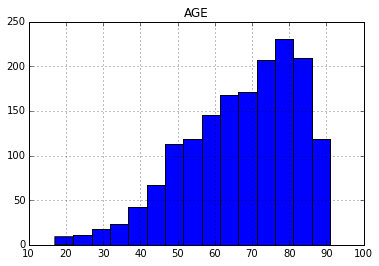

In [7]:
data.hist(column='AGE', bins=15);

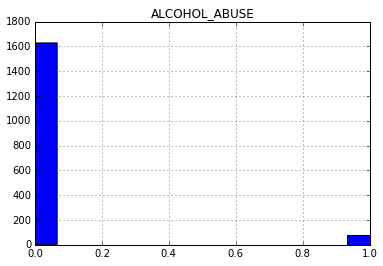

In [8]:
data.hist(column='ALCOHOL_ABUSE', bins=15);

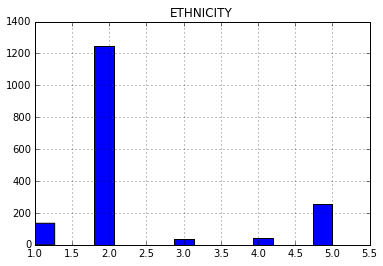

In [9]:
data.hist('ETHNICITY', bins=15);

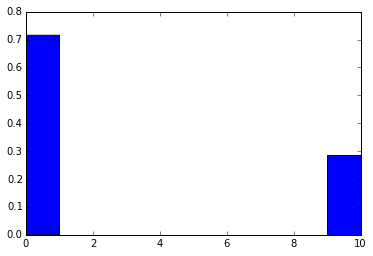

In [10]:
plt.hist(data['TARGET'].values * 10., bins=10, normed=True);

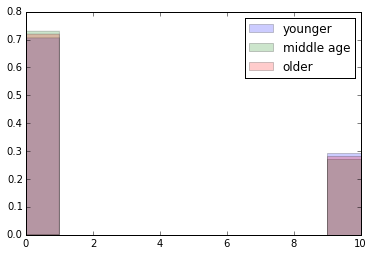

In [11]:
age = data['AGE']
bins = 10

younger = data[age < 25]
middle = data[(age > 25) & (age < 50)]
older = data[age > 50]

plt.hist(younger['TARGET'].values * bins,
         bins=bins, label="younger", alpha=0.2, normed=True)
plt.hist(middle['TARGET'].values *  bins,
         bins=bins, label="middle age", alpha=0.2, normed=True)
plt.hist(older['TARGET'].values *  bins,
         bins=bins, label="older", alpha=0.2, normed=True)
plt.legend();

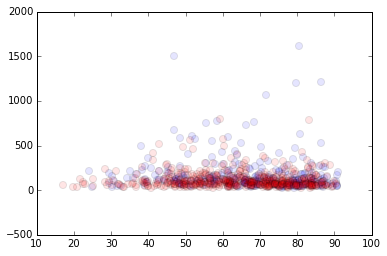

In [41]:
target = data['TARGET']
plt.scatter(x=data.AGE[target==1], y=data['ALP-0->24-max'][target==1],
          alpha=0.1, s=50, c='b');
plt.scatter(x=data.AGE[target==0], y=data['ALP-0->24-max'][target==0],
          alpha=0.1, s=50, c='r');

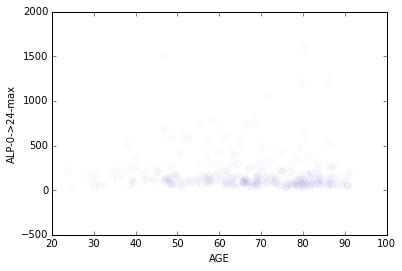

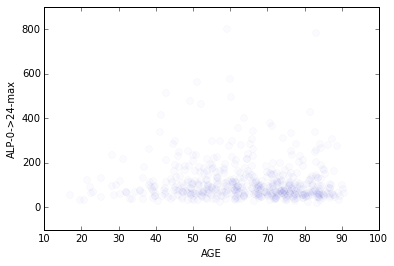

In [18]:
target = data['TARGET']
data[target==1].plot(x='AGE', y='ALP-0->24-max', kind='scatter',
          alpha=0.02, s=50,hold=);

## Building predictive models

In [43]:
data_encoded = data.apply(lambda x: pd.factorize(x)[0])
data_encoded.head(5)

,TARGET,ADMISSION_SOURCE_DESCR,ADMISSION_TYPE_DESCR,AGE,AIDS,ALCOHOL_ABUSE,ALP-0->24-mean,ALP-0->24-min,ALP-0->24-max,ALP-0->24-std,...,ESEV-0->24-min_mv,ESEV-0->24-max_mv,ESEV-0->24-std_mv,Pressors-0->24-sum_mv,Urine-0->24-sum_mv,Saline-0->24-sum_mv,Ringers-0->24-sum_mv,Coloids-0->24-sum_mv,Insuline-0->24-sum_mv,Sedatives-0->24-sum_mv
35,0,0,0,0,0,0,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
407,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1512,0,0,0,2,0,0,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
355,0,0,0,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1758,0,0,0,4,0,0,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
features = data_encoded.drop('TARGET', axis=1)
X = features.values.astype(np.float32)
y = data['TARGET'].values.astype(np.int32)

In [63]:
np.mean(y)

0.28488032691185056

In [64]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

clf = RandomForestClassifier(n_estimators=30)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

Accuracy: 0.7321 +/-0.0123


## Model error analysis

In [68]:
learning_curve?

In [71]:
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    plt.title("Learning curves for %s" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

Best test score: 0.5531


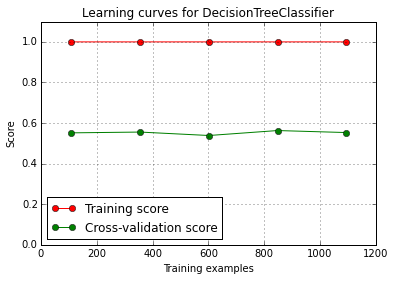

In [93]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=30)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best test score: 0.5184


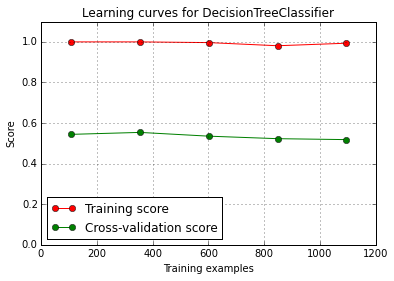

In [94]:
clf = DecisionTreeClassifier(max_depth=15)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best test score: 0.5916


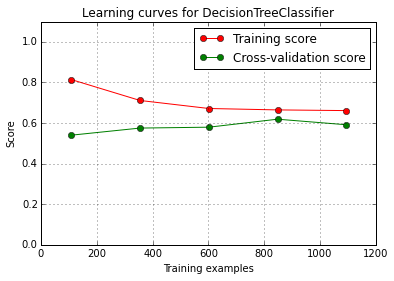

In [95]:
clf = DecisionTreeClassifier(max_depth=2)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

In [25]:
from sklearn.learning_curve import validation_curve


def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=5, n_jobs=-1, scoring=None):
    estimator_name = type(estimator).__name__
    plt.title("Validation curves for %s on %s"
              % (param_name, estimator_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name, param_range,
        cv=cv, n_jobs=n_jobs, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

In [76]:
*ylim?

Best test score: 0.5797


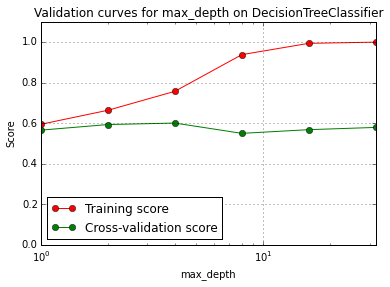

In [26]:
clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 4, 8, 16, 32]

plot_validation_curve(clf, X_train, y_train,
                      param_name, param_range, scoring='roc_auc')

## Random forests, Gradient Boosted Decision Trees

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_features=10,
                             max_depth=10)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         n_jobs=-1)
print("ROC Random Forest: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC Random Forest: 0.7176 +/-0.0171


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_leaf_nodes=5, learning_rate=0.1,
                                 n_estimators=30)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         n_jobs=-1)
print("ROC AUC Gradient Boosted Trees: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC Gradient Boosted Trees: 0.7417 +/-0.0123


## Evaluation of the best model

In [29]:
%%time
_ = clf.fit(X_train, y_train)

CPU times: user 3.05 s, sys: 56.3 ms, total: 3.11 s
Wall time: 3.11 s


In [30]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.7604


In [31]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names='TARGET'))

             precision    recall  f1-score   support

          T       0.74      0.96      0.84       238
          A       0.73      0.23      0.35       105

avg / total       0.74      0.74      0.69       343



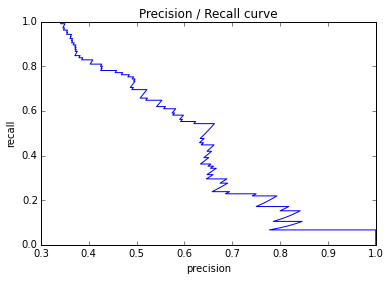

In [32]:
from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(precision_gb, recall_gb)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision / Recall curve');

## Variable importances

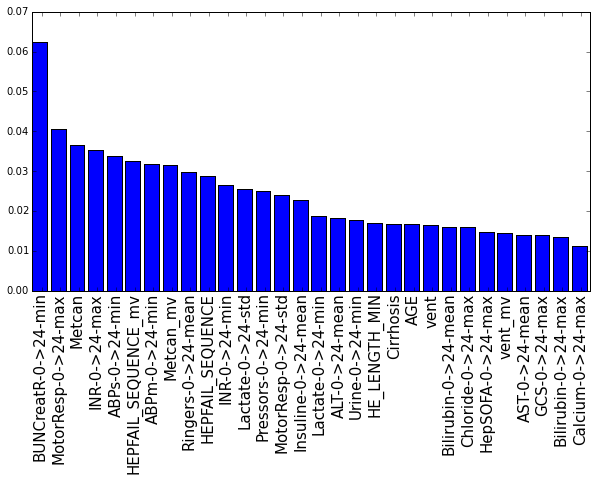

In [33]:
plt.figure(figsize=(10, 5))

ordering = np.argsort(clf.feature_importances_)[::-1][:30]

importances = clf.feature_importances_[ordering]
feature_names = features.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

## Imputation

In [34]:
features = data.drop('TARGET', axis=1)
X = features.values.astype(np.float32)
y = data['TARGET'].values.astype(np.int32)

In [35]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

clf = Pipeline([('imputer', Imputer(strategy='mean')),
                ('rf', RandomForestClassifier(n_estimators=30))])

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

Accuracy: 0.7569 +/-0.0096


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Place the python file <code>classifier.py</code>, <a href = "https://drive.google.com/file/d/0BzwKr6zuOkdROWpnUUE0Z1paZms/view?usp=sharing"><code>user_test_submission.py</code></a> in a directory, set the paths to the data files in <code>user_test_submission.py</code>, and run 

<code>python user_test_submission.py</code>

If it runs and prints 
<code>
auc =  [some_number_between_0_and_1]
accuracy =  [some_number_between_0_and_1]
auc =  [some_number_between_0_and_1]
accuracy =  [some_number_between_0_and_1]
</code>
you can submit the code.

In [15]:
def missing(X):
    X2 = X
    for i in range(X.shape[1]):
        a = np.nanmax(X[:,i])
        X2[np.isnan(X[:,i]),i] = a
    return X2

In [16]:
x=data.values
x=x[:,1:]
x.shape

(1713, 752)

In [19]:
print np.sum(np.isnan(x))
print np.sum(np.isnan(missing(x)))
missing(x).shape

0
0


(1713, 752)

In [99]:
X2[10:15,10:15]

array([[ 5.,  5.,  0.,  5.,  5.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [ 6.,  6.,  0.,  6.,  6.]], dtype=float32)

In [26]:
np.isfinite(x[:,1])

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [2]:
dict(ne=1, md=2, lr=3, mss=3, msl=3, ss=3)

{'lr': 3, 'md': 2, 'msl': 3, 'mss': 3, 'ne': 1, 'ss': 3}